In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["font.family"] = "Times"

In [2]:
STRATEGY = ["desktop", "mobile"][1]
CATEGORY = ["accessibility", "performance", "best-practices"][1]
JSON_FILE_NAME = f"data/{STRATEGY}_{CATEGORY}.json"
print(JSON_FILE_NAME)
json_obj = None
with open(JSON_FILE_NAME, "r") as in_file:
    json_obj = json.load(in_file)

data/mobile_performance.json


In [3]:
scores = []
sites = {}
for k, v in json_obj.items():
    try:
        score = v["lighthouseResult"]["categories"]["performance"]["score"] * 100
        scores.append(score)
        sites[k] = score
    except:
        print(k)
scores = np.array(scores)


Konya Büyükşehir Belediyesi


In [4]:
i = 1
for k in sorted(sites, key=sites.get, reverse=True):
    print(i, k, sites[k])
    i += 1

1 Sakarya Büyükşehir Belediyesi 72.0
2 Van Büyükşehir Belediyesi 56.99999999999999
3 Adana Büyükşehir Belediyesi 55.00000000000001
4 İzmir Büyükşehir Belediyesi 54.0
5 Erzurum Büyükşehir Belediyesi 51.0
6 Mersin Büyükşehir Belediyesi 50.0
7 Eskişehir Büyükşehir Belediyesi 47.0
8 Denizli Büyükşehir Belediyesi 44.0
9 İstanbul Büyükşehir Belediyesi 42.0
10 Mardin Büyükşehir Belediyesi 42.0
11 Samsun Büyükşehir Belediyesi 41.0
12 Diyarbakır Büyükşehir Belediyesi 40.0
13 Gaziantep Büyükşehir Belediyesi 39.0
14 Kayseri Büyükşehir Belediyesi 38.0
15 Ankara Büyükşehir Belediyesi 36.0
16 Aydın Büyükşehir Belediyesi 36.0
17 Tekirdağ Büyükşehir Belediyesi 33.0
18 Kahramanmaraş Büyükşehir Belediyesi 32.0
19 Antalya Büyükşehir Belediyesi 28.999999999999996
20 Hatay Büyükşehir Belediyesi 28.999999999999996
21 Manisa Büyükşehir Belediyesi 25.0
22 Ordu Büyükşehir Belediyesi 25.0
23 Trabzon Büyükşehir Belediyesi 22.0
24 Balıkesir Büyükşehir Belediyesi 16.0
25 Kocaeli Büyükşehir Belediyesi 11.0
26 Şanlı

In [5]:
np.mean(scores)

34.44827586206897

In [7]:
len(scores[np.where(scores >= 90)]) / len(scores) * 100

0.0

In [8]:
len(scores[np.where(scores <= 50)]) / len(scores) * 100

82.75862068965517

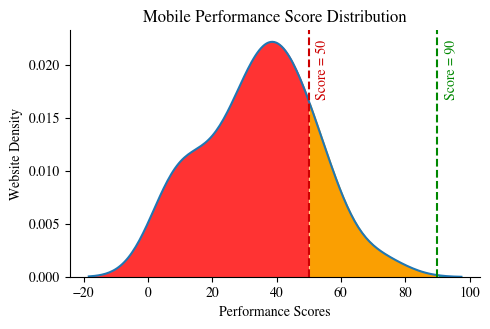

In [13]:
graph = sns.displot(scores, kind="kde", height=3, aspect=5/3)
graph.refline(x=90, color="#080")
graph.refline(x=50, color="#c00")

graph.set(xlabel="Performance Scores",
          ylabel="Website Density",
          title="Mobile Performance Score Distribution")

axes = graph.axes.flatten()
axes[0].text(92, 0.017, "Score = 90", c="#080", rotation=90)
axes[0].text(52, 0.017, "Score = 50", c="#c00", rotation=90)

kde_x = axes[0].lines[0].get_xdata()
kde_y = axes[0].lines[0].get_ydata()

axes[0].fill_between(kde_x, kde_y, where=(kde_x < 50), color="#f33")
axes[0].fill_between(kde_x, kde_y, where=(kde_x >= 50)
                     & (kde_x <= 90), color="#fa9f02")
axes[0].fill_between(kde_x, kde_y, where=(kde_x > 90), color="#0c6")

plt.savefig(f"results/{STRATEGY}_{CATEGORY}.pdf", bbox_inches="tight")
plt.show()